# PARKINSON SPEECH DATASET WITH MULTIPLE TYPES OF SOUND RECORDING.




In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/train_data.txt', names=[ 'id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information'])
print(df)

      id  Jitter_local  Jitter_local_absolute  Jitter_rap  Jitter_ppq5  \
0      1         1.488               0.000090       0.900        0.794   
1      1         0.728               0.000038       0.353        0.376   
2      1         1.220               0.000074       0.732        0.670   
3      1         2.502               0.000123       1.156        1.634   
4      1         3.509               0.000167       1.715        1.539   
...   ..           ...                    ...         ...          ...   
1035  40         5.127               0.000398       2.721        2.510   
1036  40         1.757               0.000133       0.808        0.690   
1037  40         2.912               0.000226       1.141        1.266   
1038  40         3.788               0.000275       1.786        1.484   
1039  40         1.809               0.000149       0.680        0.843   

      Jitter_ddp  Shimmer_local  Shimmer_local_dB  Shimmer_apq3  Shimmer_apq5  \
0          2.699          8.33

In [5]:
df_val = pd.read_csv('/content/drive/MyDrive/test_data.txt', names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'class_information'
                               ])
print(df_val)

     id  Jitter_local  Jitter_local_absolute  Jitter_rap  Jitter_ppq5  \
0     1         0.135               0.000007       0.067        0.078   
1     1         0.143               0.000007       0.073        0.081   
2     1         0.162               0.000008       0.087        0.089   
3     1         0.140               0.000007       0.075        0.089   
4     1         0.150               0.000007       0.080        0.097   
..   ..           ...                    ...         ...          ...   
163  28         0.257               0.000018       0.105        0.122   
164  28         0.311               0.000021       0.129        0.148   
165  28         0.434               0.000029       0.178        0.229   
166  28         0.464               0.000031       0.195        0.227   
167  28         0.474               0.000031       0.179        0.230   

     Jitter_ddp  Shimmer_local  Shimmer_local_dB  Shimmer_apq3  Shimmer_apq5  \
0         0.202          2.033             

In [6]:
df.describe()

,id,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,...,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,UPDRS,class_information
count,1040.00000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,20.50000,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,11.54895,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,1.00000,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.75000,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,20.50000,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,30.25000,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,40.00000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


In [7]:
df.head()

,id,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,...,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,UPDRS,class_information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [8]:
df.head().T


,0,1,2,3,4
id,1.000000,1.000000,1.000000,1.000000,1.000000
Jitter_local,1.488000,0.728000,1.220000,2.502000,3.509000
Jitter_local_absolute,0.000090,0.000038,0.000074,0.000123,0.000167
Jitter_rap,0.900000,0.353000,0.732000,1.156000,1.715000
Jitter_ppq5,0.794000,0.376000,0.670000,1.634000,1.539000
Jitter_ddp,2.699000,1.059000,2.196000,3.469000,5.145000
Shimmer_local,8.334000,5.864000,8.719000,13.513000,9.112000
Shimmer_local_dB,0.779000,0.642000,0.875000,1.273000,1.040000
Shimmer_apq3,4.517000,2.058000,4.347000,5.263000,3.102000
Shimmer_apq5,4.609000,3.180000,5.166000,8.771000,4.927000


In [9]:
df_val.describe()

,id,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,class_information
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,14.500000,0.640685,0.000043,0.335405,0.374893,1.006220,5.162655,0.474345,2.679363,3.044815,...,151.563018,173.391268,157.601190,155.880952,0.006663,0.000241,0.767256,0.226190,0.658393,1.0
std,8.101896,0.824415,0.000055,0.450116,0.528379,1.350352,3.069454,0.266516,1.799648,1.680081,...,49.301713,48.981540,47.042106,47.303430,0.002116,0.000344,2.366691,0.873443,2.301585,0.0
min,1.000000,0.119000,0.000005,0.048000,0.062000,0.143000,0.813000,0.072000,0.381000,0.485000,...,74.261000,82.171000,34.000000,33.000000,0.003871,0.000020,0.000000,0.000000,0.000000,1.0
25%,7.750000,0.247750,0.000015,0.113500,0.132750,0.340000,3.144000,0.298000,1.470000,1.821750,...,108.933000,140.582000,122.750000,120.750000,0.005140,0.000060,0.000000,0.000000,0.000000,1.0
50%,14.500000,0.405000,0.000028,0.180000,0.218500,0.540000,4.791500,0.442000,2.370500,2.935000,...,149.534500,169.267000,153.500000,152.500000,0.006300,0.000103,0.000000,0.000000,0.000000,1.0
75%,21.250000,0.607500,0.000042,0.344250,0.341000,1.033500,6.457500,0.593500,3.384750,3.755000,...,186.729500,206.090500,191.000000,190.000000,0.007492,0.000250,0.000000,0.000000,0.000000,1.0
max,28.000000,5.238000,0.000443,2.698000,3.188000,8.094000,23.608000,1.944000,13.003000,11.471000,...,252.250000,294.739000,253.000000,252.000000,0.012669,0.002439,15.464000,7.000000,16.959000,1.0


In [10]:
df_val.head()

,id,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,class_information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [11]:
df_val.head().T

,0,1,2,3,4
id,1.000000,1.000000,1.000000,1.000000,1.000000
Jitter_local,0.135000,0.143000,0.162000,0.140000,0.150000
Jitter_local_absolute,0.000007,0.000007,0.000008,0.000007,0.000007
Jitter_rap,0.067000,0.073000,0.087000,0.075000,0.080000
Jitter_ppq5,0.078000,0.081000,0.089000,0.089000,0.097000
Jitter_ddp,0.202000,0.219000,0.260000,0.224000,0.240000
Shimmer_local,2.033000,1.236000,1.338000,1.086000,1.049000
Shimmer_local_dB,0.178000,0.107000,0.117000,0.094000,0.091000
Shimmer_apq3,1.074000,0.612000,0.630000,0.556000,0.533000
Shimmer_apq5,1.336000,0.904000,0.948000,0.747000,0.698000


In [12]:
print(df.shape)
print(df_val.shape)

(1040, 29)
(168, 28)


In [13]:
print(df.size)
print(df_val.size)

30160
4704


In [14]:
df.values

array([[1.00000e+00, 1.48800e+00, 9.02130e-05, ..., 0.00000e+00,
        2.30000e+01, 1.00000e+00],
       [1.00000e+00, 7.28000e-01, 3.76980e-05, ..., 0.00000e+00,
        2.30000e+01, 1.00000e+00],
       [1.00000e+00, 1.22000e+00, 7.40410e-05, ..., 1.78000e-01,
        2.30000e+01, 1.00000e+00],
       ...,
       [4.00000e+01, 2.91200e+00, 2.26205e-04, ..., 4.57400e+00,
        1.00000e+00, 0.00000e+00],
       [4.00000e+01, 3.78800e+00, 2.74883e-04, ..., 1.95750e+01,
        1.00000e+00, 0.00000e+00],
       [4.00000e+01, 1.80900e+00, 1.48510e-04, ..., 3.38700e+00,
        1.00000e+00, 0.00000e+00]])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1040 non-null   int64  
 1   Jitter_local                         1040 non-null   float64
 2   Jitter_local_absolute                1040 non-null   float64
 3   Jitter_rap                           1040 non-null   float64
 4   Jitter_ppq5                          1040 non-null   float64
 5   Jitter_ddp                           1040 non-null   float64
 6   Shimmer_local                        1040 non-null   float64
 7   Shimmer_local_dB                     1040 non-null   float64
 8   Shimmer_apq3                         1040 non-null   float64
 9   Shimmer_apq5                         1040 non-null   float64
 10  Shimmer_apq11                        1040 non-null   float64
 11  Shimmer_dda                   

In [16]:
df.columns

Index(['id', 'Jitter_local', 'Jitter_local_absolute', 'Jitter_rap',
       'Jitter_ppq5', 'Jitter_ddp', 'Shimmer_local', 'Shimmer_local_dB',
       'Shimmer_apq3', 'Shimmer_apq5', 'Shimmer_apq11', 'Shimmer_dda', 'AC',
       'NTH', 'HTN', 'Median_pitch', 'Mean_pitch', 'Standard_deviation',
       'Minimum_pitch', 'Maximum_pitch', 'Number_of_pulses',
       'Number_of_periods', 'Mean_period', 'Standard_deviation_of_period',
       'Fraction_of_locally_unvoiced_frames', 'Number_of_voice_breaks',
       'Degree_of_voice_breaks', 'UPDRS', 'class_information'],
      dtype='object')

In [17]:
df['class_information']

0       1
1       1
2       1
3       1
4       1
       ..
1035    0
1036    0
1037    0
1038    0
1039    0
Name: class_information, Length: 1040, dtype: int64

In [18]:
df['class_information'].value_counts()

1    520
0    520
Name: class_information, dtype: int64

**DATA** **VISUALISATION**(matplotlib)

<Axes: title={'center': 'Distribution of the traget variable : UPDRS score'}>

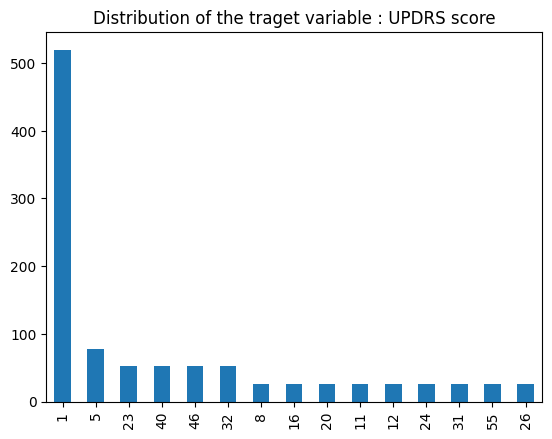

In [19]:
title = "Distribution of the traget variable : UPDRS score"
to_plot = df.UPDRS.value_counts(dropna = False)
to_plot.plot.bar(title = title)

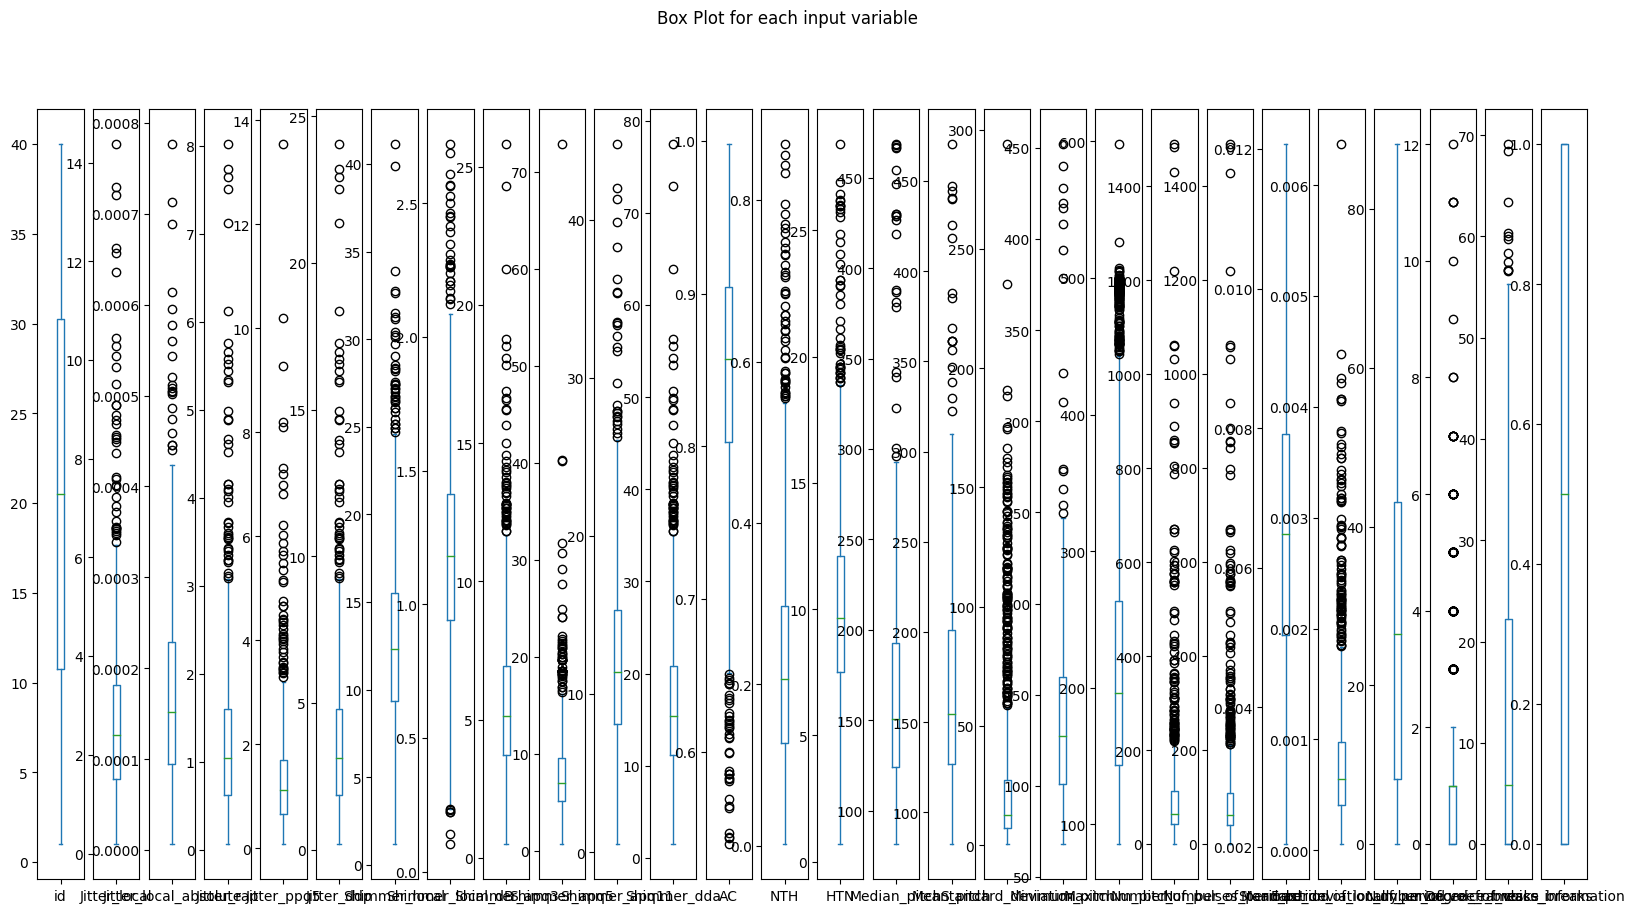

In [20]:
df.drop('UPDRS', axis=1).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,10), 
                                        title='Box Plot for each input variable')
plt.show()


<Axes: title={'center': 'Impact of the number of pauses on the UPDRS score'}, xlabel='Number_of_voice_breaks', ylabel='UPDRS'>

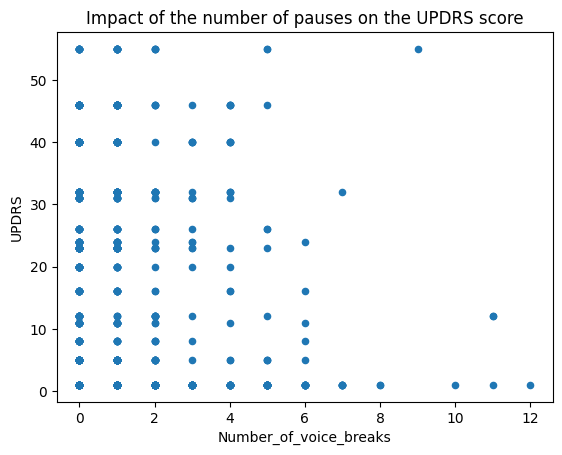

In [21]:
title = "Impact of the number of pauses on the UPDRS score"
df.plot.scatter("Number_of_voice_breaks", "UPDRS", title=title)

<Axes: title={'center': 'Impact of the number of unspoken words on the UPDRS score'}, xlabel='Fraction_of_locally_unvoiced_frames', ylabel='UPDRS'>

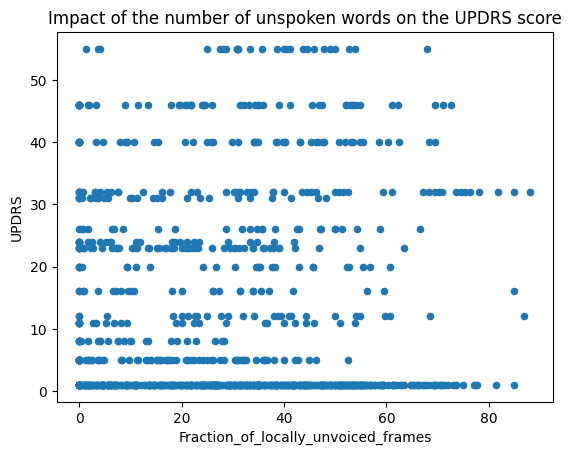

In [22]:
title = "Impact of the number of unspoken words on the UPDRS score"
df.plot.scatter("Fraction_of_locally_unvoiced_frames", "UPDRS", title= title)

<Axes: title={'center': 'Impact of the degree of voice break on the UPDRS score'}, xlabel='Degree_of_voice_breaks', ylabel='UPDRS'>

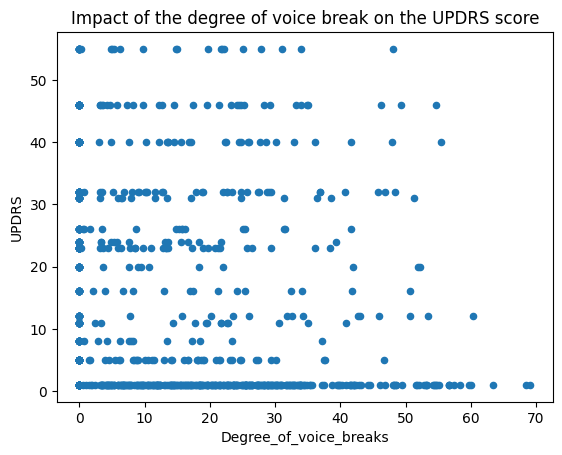

In [23]:
title = "Impact of the degree of voice break on the UPDRS score"
df.plot.scatter("Degree_of_voice_breaks", "UPDRS", title= title)

In [24]:
df.dtypes

id                                       int64
Jitter_local                           float64
Jitter_local_absolute                  float64
Jitter_rap                             float64
Jitter_ppq5                            float64
Jitter_ddp                             float64
Shimmer_local                          float64
Shimmer_local_dB                       float64
Shimmer_apq3                           float64
Shimmer_apq5                           float64
Shimmer_apq11                          float64
Shimmer_dda                            float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median_pitch                           float64
Mean_pitch                             float64
Standard_deviation                     float64
Minimum_pitch                          float64
Maximum_pitch                          float64
Number_of_pulses                         int64
Number_of_per

In [25]:
df.isnull().sum()

id                                     0
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_loca

In [26]:
df_val.isnull().sum()

id                                     0
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_loca

In [27]:
#sns.pairplot(df)

Axes(0.125,0.11;0.775x0.77)


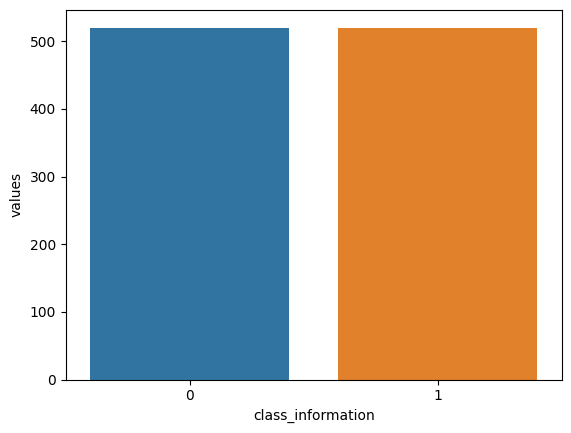

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = df['class_information'].value_counts()
temp_df = pd.DataFrame({'class_information' : temp.index, 'values': temp.values})
print(sns.barplot(x = 'class_information', y= 'values' , data = temp_df))

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


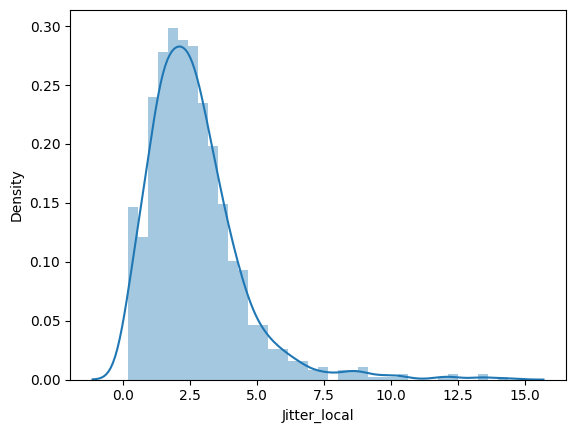

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


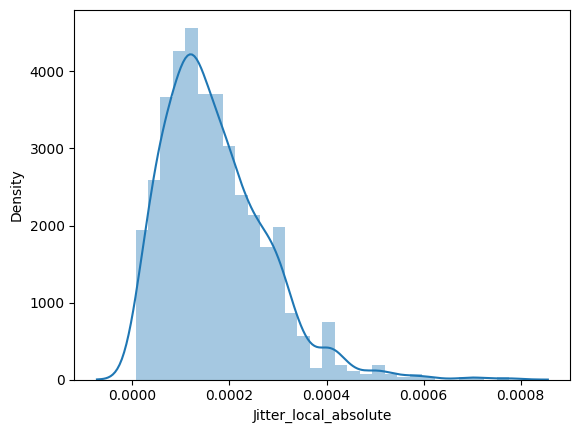

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


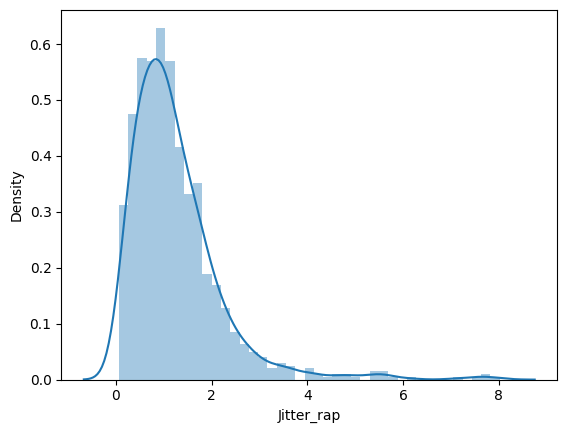

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


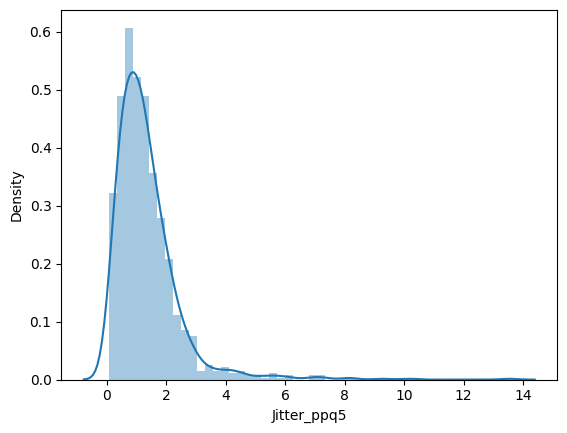

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


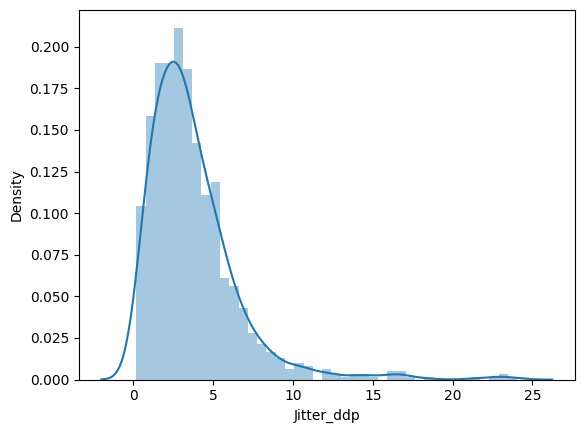

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


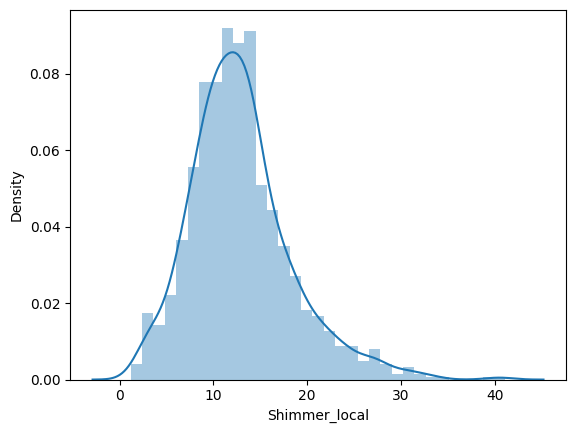

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


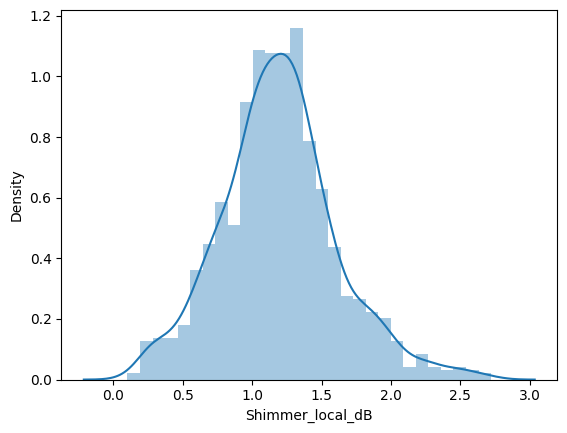

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


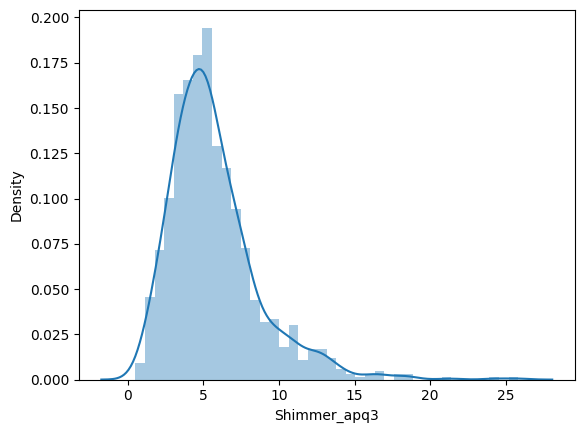

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


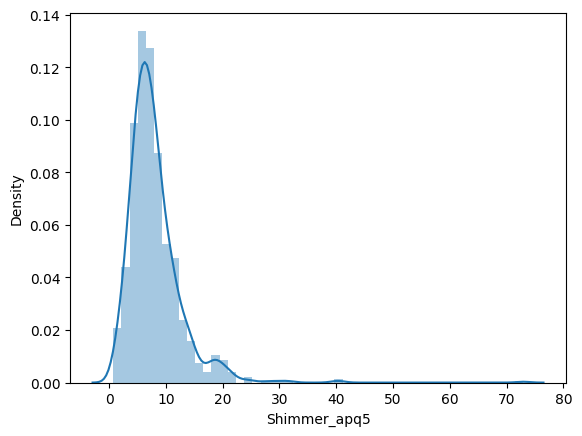

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


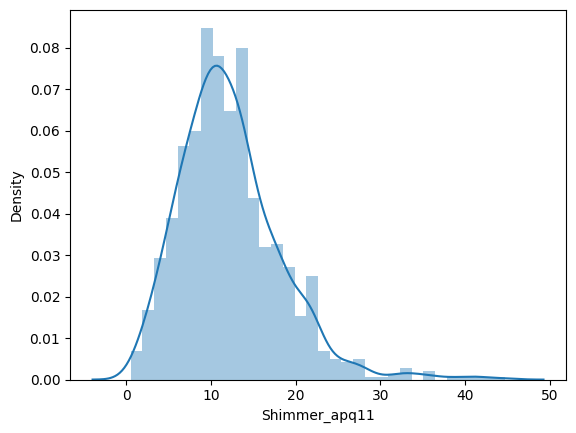

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


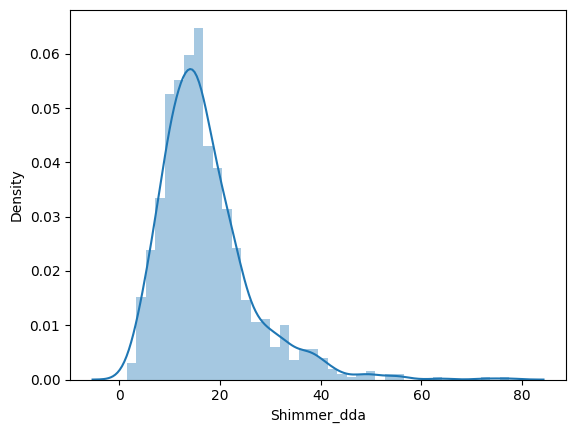

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


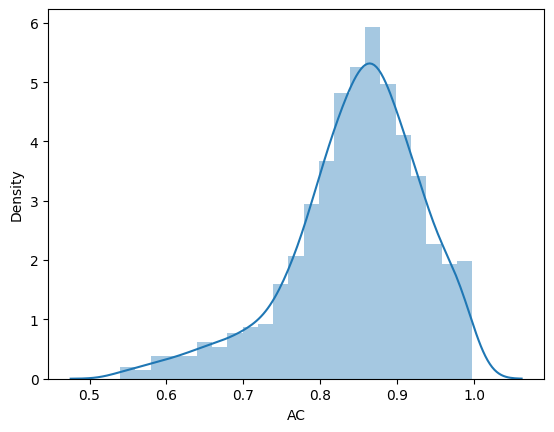

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


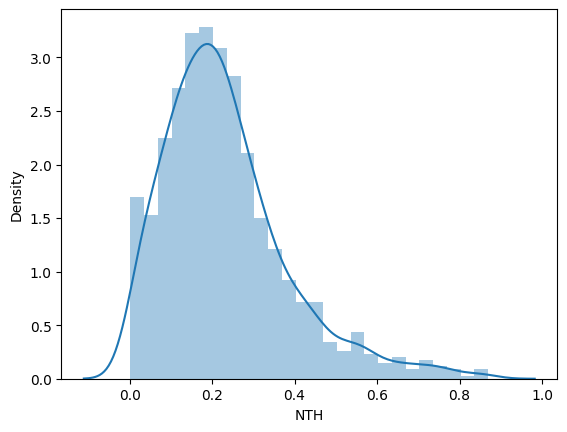

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


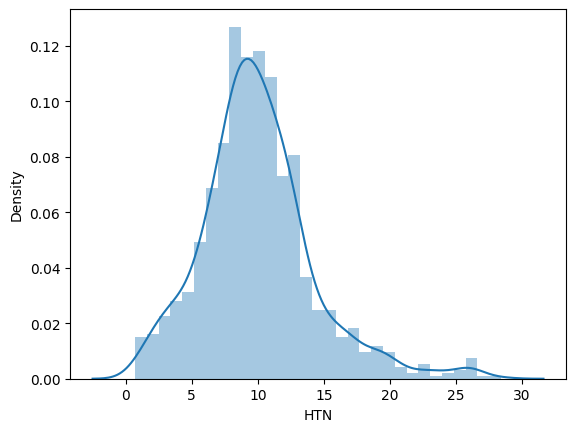

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


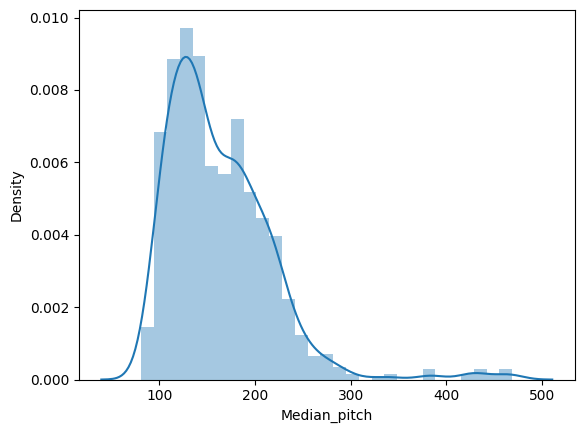

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


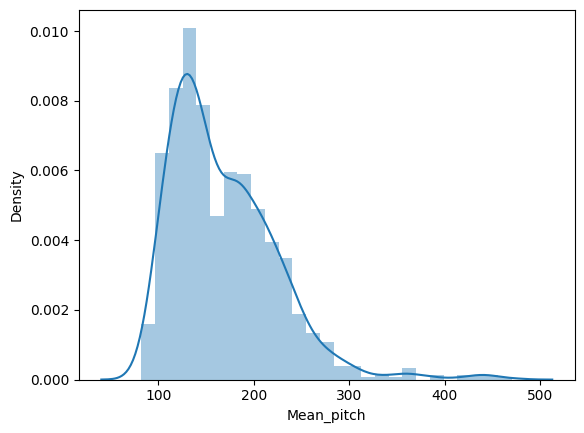

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


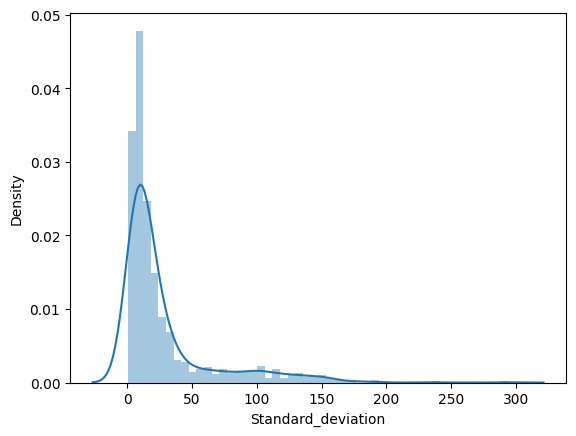

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


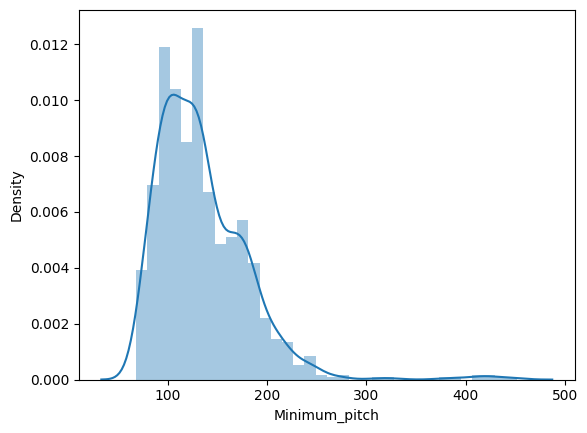

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


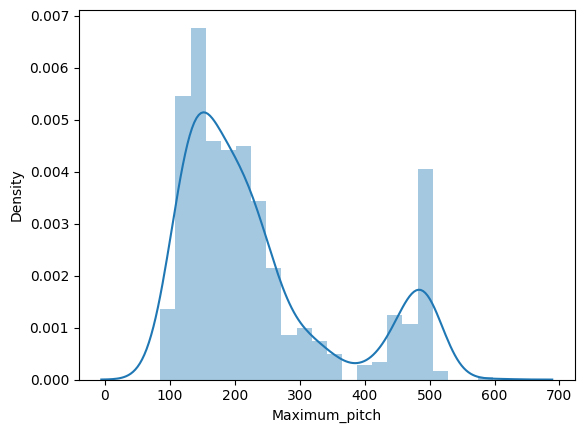

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


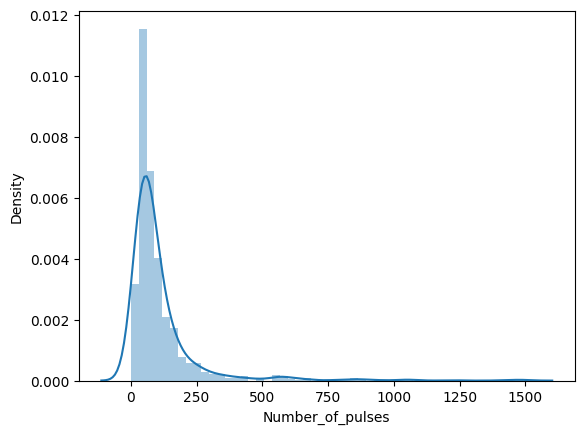

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


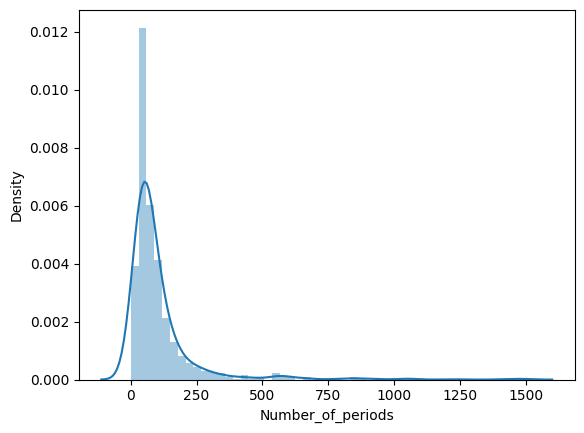

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


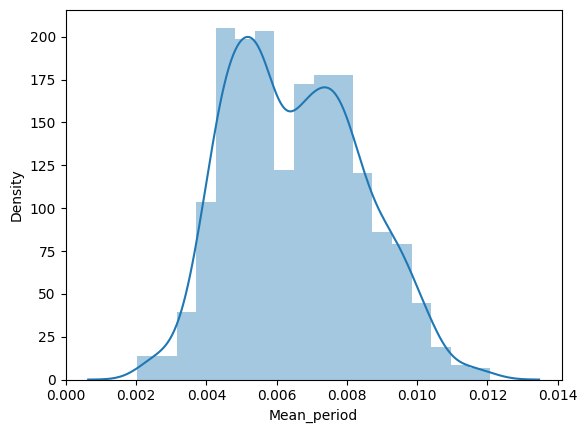

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


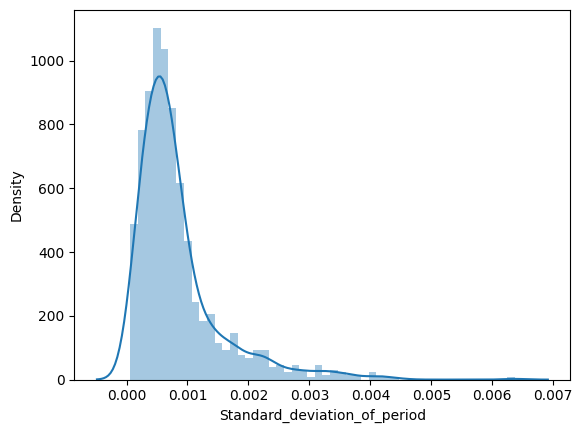

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


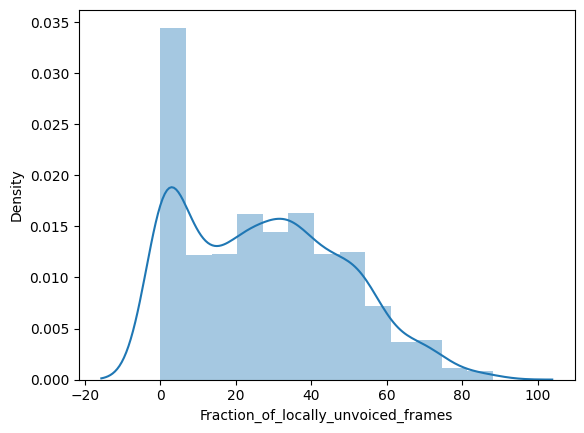

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


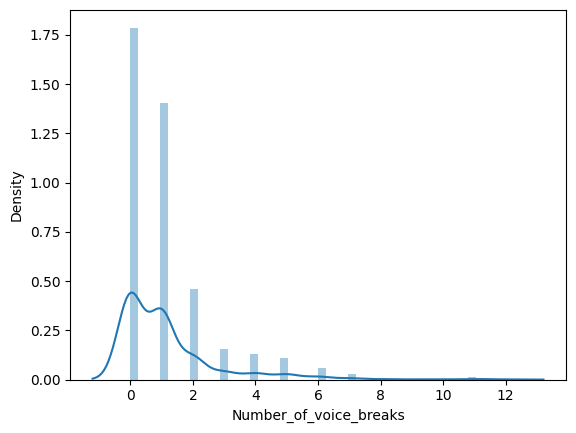

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


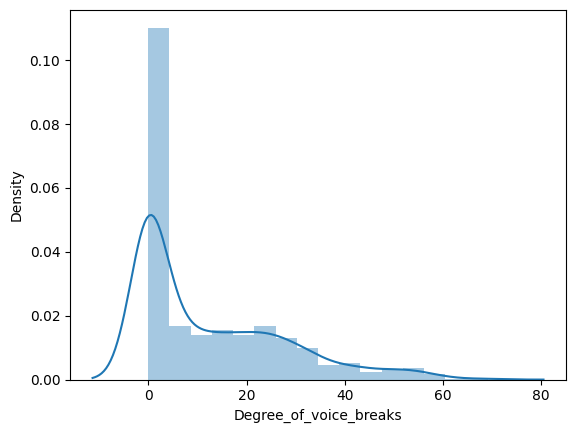

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


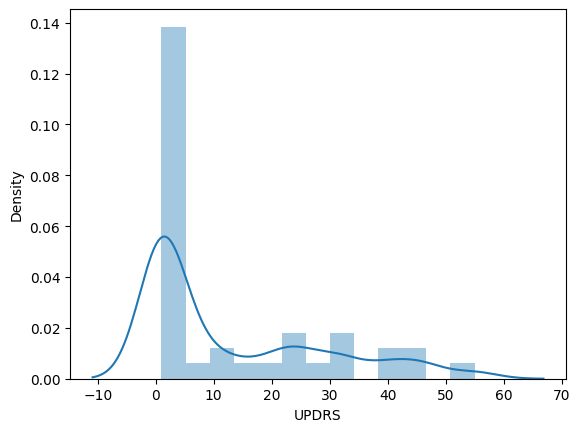

<ipython-input-29-bde5c38de01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


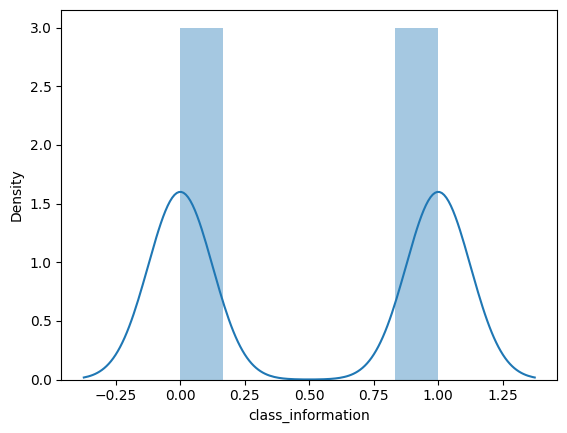

In [29]:
#finding the distribution of data 

def distplot(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  distplot(i)

In [30]:
# #finding correlations

# plt.figure(figsize= (20,20))
# corr = df.corr()
# sns.heatmap(corr, annot = True)

In [31]:
df.columns

Index(['id', 'Jitter_local', 'Jitter_local_absolute', 'Jitter_rap',
       'Jitter_ppq5', 'Jitter_ddp', 'Shimmer_local', 'Shimmer_local_dB',
       'Shimmer_apq3', 'Shimmer_apq5', 'Shimmer_apq11', 'Shimmer_dda', 'AC',
       'NTH', 'HTN', 'Median_pitch', 'Mean_pitch', 'Standard_deviation',
       'Minimum_pitch', 'Maximum_pitch', 'Number_of_pulses',
       'Number_of_periods', 'Mean_period', 'Standard_deviation_of_period',
       'Fraction_of_locally_unvoiced_frames', 'Number_of_voice_breaks',
       'Degree_of_voice_breaks', 'UPDRS', 'class_information'],
      dtype='object')

In [32]:
df = pd.read_csv('/content/drive/MyDrive/train_data.txt', names=[ 'id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 'UPDRS',
                               'class_information'])
train_df =  df
print(train_df)

      id  Jitter_local  Jitter_local_absolute  Jitter_rap  Jitter_ppq5  \
0      1         1.488               0.000090       0.900        0.794   
1      1         0.728               0.000038       0.353        0.376   
2      1         1.220               0.000074       0.732        0.670   
3      1         2.502               0.000123       1.156        1.634   
4      1         3.509               0.000167       1.715        1.539   
...   ..           ...                    ...         ...          ...   
1035  40         5.127               0.000398       2.721        2.510   
1036  40         1.757               0.000133       0.808        0.690   
1037  40         2.912               0.000226       1.141        1.266   
1038  40         3.788               0.000275       1.786        1.484   
1039  40         1.809               0.000149       0.680        0.843   

      Jitter_ddp  Shimmer_local  Shimmer_local_dB  Shimmer_apq3  Shimmer_apq5  \
0          2.699          8.33

In [33]:
df_val = pd.read_csv('/content/drive/MyDrive/test_data.txt', names=[ 'id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information'])
test_df =  df_val
print(test_df)

     id  Jitter_local  Jitter_local_absolute  Jitter_rap  Jitter_ppq5  \
0     1         0.135               0.000007       0.067        0.078   
1     1         0.143               0.000007       0.073        0.081   
2     1         0.162               0.000008       0.087        0.089   
3     1         0.140               0.000007       0.075        0.089   
4     1         0.150               0.000007       0.080        0.097   
..   ..           ...                    ...         ...          ...   
163  28         0.257               0.000018       0.105        0.122   
164  28         0.311               0.000021       0.129        0.148   
165  28         0.434               0.000029       0.178        0.229   
166  28         0.464               0.000031       0.195        0.227   
167  28         0.474               0.000031       0.179        0.230   

     Jitter_ddp  Shimmer_local  Shimmer_local_dB  Shimmer_apq3  Shimmer_apq5  \
0         0.202          2.033             

In [34]:
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)


In [35]:
#identifying the missing columns in the testing data
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

missing_columns = train_columns.difference(test_columns)

In [36]:
#Drop the missing columns from the training data
train_df.drop(columns= missing_columns, inplace = True)
train_df

,id,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,class_information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,90.051,451.366,75,70,0.007257,0.001714,16.667,3,19.575,0


In [37]:
train_df.columns

Index(['id', 'Jitter_local', 'Jitter_local_absolute', 'Jitter_rap',
       'Jitter_ppq5', 'Jitter_ddp', 'Shimmer_local', 'Shimmer_local_dB',
       'Shimmer_apq3', 'Shimmer_apq5', 'Shimmer_apq11', 'Shimmer_dda', 'AC',
       'NTH', 'HTN', 'Median_pitch', 'Mean_pitch', 'Standard_deviation',
       'Minimum_pitch', 'Maximum_pitch', 'Number_of_pulses',
       'Number_of_periods', 'Mean_period', 'Standard_deviation_of_period',
       'Fraction_of_locally_unvoiced_frames', 'Number_of_voice_breaks',
       'Degree_of_voice_breaks', 'class_information'],
      dtype='object')

In [38]:
#split the modified training data into features(x_train) and target variable (y_train)
x_train = train_df.drop('class_information', axis =1)
y_train = train_df['class_information']
print(x_train.shape)
print(y_train.shape)

(1040, 27)
(1040,)


In [39]:
x_test = test_df.drop('class_information', axis = 1)
y_test = test_df['class_information']
print(x_test.shape)
print(y_test.shape)

(168, 27)
(168,)


In [40]:
#perform feature scaling
import sklearn 
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler((-1,1))
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.fit_transform(x_test)

In [43]:
# perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(x_train_scaled, y_train)

Perceptron()

In [44]:
train_pred = clf.predict(x_train_scaled)

In [45]:
train_pred

array([1, 1, 1, ..., 0, 0, 0])

In [46]:
test_pred = clf.predict(x_test_scaled)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score
train_accur = accuracy_score(y_train, train_pred)
test_accur =  accuracy_score(y_test, test_pred)
print(train_accur)
print(test_accur)

1.0
0.6547619047619048


In [48]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [49]:

clf1 = Perceptron()
clf2 = LogisticRegression()
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = SVC()
clf6 = DecisionTreeClassifier()
clf = [clf1, clf2, clf3, clf4, clf5, clf6]
clf_name = ['PER', 'LR', 'KNN', 'GNB', 'SVC', 'DTC']

**Training accuracy**.


In [50]:
acc_train = {}
train_acc1 = []
from sklearn.metrics import accuracy_score
for model, name in zip(clf, clf_name):
  model.fit(x_train_scaled, y_train)
  pred= model.predict(x_train_scaled)
  acc_train[name] = accuracy_score(pred, y_train)

print("Training accuracy: ")
for i, j in acc_train.items():
  train_acc1.append(j)
  print(i , ":", j)

train_acc1

Training accuracy: 
PER : 1.0
LR : 1.0
KNN : 0.9519230769230769
GNB : 0.8894230769230769
SVC : 0.9961538461538462
DTC : 1.0


[1.0, 1.0, 0.9519230769230769, 0.8894230769230769, 0.9961538461538462, 1.0]

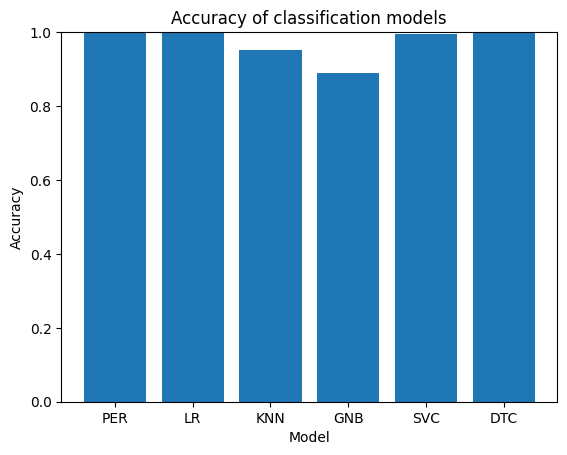

In [51]:
#bar graph for each model
import matplotlib.pyplot as plt
plt.bar(clf_name, train_acc1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of classification models')
plt.ylim(0,1)
plt.show()

**TESTING** **ACCURACY**

In [52]:
acc_test = {}
test_acc1 =[]
from sklearn.metrics import accuracy_score
for model, name in zip(clf, clf_name):
  model.fit(x_train_scaled, y_train)
  pred= model.predict(x_test_scaled)
  acc_test[name] = accuracy_score(pred, y_test)

print("Testing accuracy: ")
for i, j in acc_test.items():
  test_acc1.append(j)
  print(i , ":", j)

test_acc1

Testing accuracy: 
PER : 0.6547619047619048
LR : 0.6071428571428571
KNN : 0.6607142857142857
GNB : 0.5059523809523809
SVC : 0.6547619047619048
DTC : 0.7142857142857143


[0.6547619047619048,
 0.6071428571428571,
 0.6607142857142857,
 0.5059523809523809,
 0.6547619047619048,
 0.7142857142857143]

**BAR GRAPH FOR TESTING ACCURACY.**

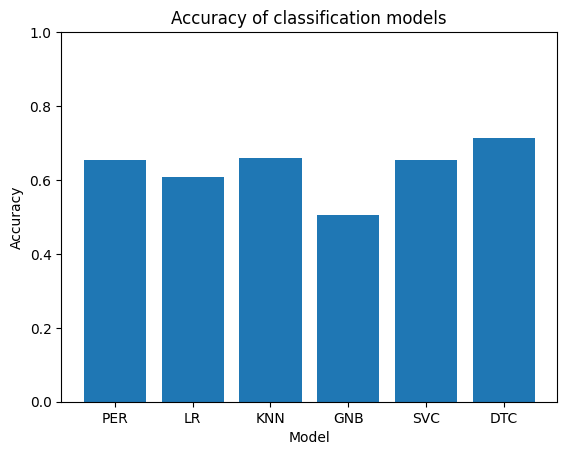

In [53]:
#bar graph for each model
import matplotlib.pyplot as plt
plt.bar(clf_name, test_acc1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of classification models')
plt.ylim(0,1)
plt.show()

In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

# evaluating the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE Score :", np.sqrt(mse))

# r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)


RMSE Score : 0.5345224838248488
R2 Score : 0.0


In [55]:
from sklearn.svm import SVR

svrmodel = SVR()
svrmodel.fit(x_train_scaled, y_train)

y_pred = svrmodel.predict(x_test_scaled)

# evaluating the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE Score :", np.sqrt(mse))

# r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)


RMSE Score : 0.47088498164111947
R2 Score : 0.0


In [56]:
# modelling

from sklearn.linear_model import LinearRegression

lmodel = LinearRegression()
lmodel.fit(x_train_scaled, y_train)

y_pred =lmodel.predict(x_test_scaled)

# evaluating the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE Score :", np.sqrt(mse))

# r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)


RMSE Score : 0.45314057249464296
R2 Score : 0.0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [58]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_predictions = lr.predict(x_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)
dt_predictions = dt.predict(x_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
rf_predictions = rf.predict(x_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Linear Regression:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

print("\nDecision Tree Regression:")
print("MSE:", dt_mse)
print("R2 Score:", dt_r2)

print("\nRandom Forest Regression:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)

Linear Regression:
MSE: 0.20533637844077277
R2 Score: 0.0

Decision Tree Regression:
MSE: 0.2857142857142857
R2 Score: 0.0

Random Forest Regression:
MSE: 0.2857142857142857
R2 Score: 0.0


In [59]:
x_test_scaled[0]

array([-1.68927752, -1.44230659, -1.53283194, -1.20537658, -1.1160898 ,
       -1.20501377, -1.99747254, -2.42193574, -1.53484095, -1.37386875,
       -1.76928234, -1.53473637,  1.75137737, -1.50394261,  3.31164892,
        0.40892618,  0.31411222, -0.7281036 ,  1.06226095, -0.38685305,
        0.48851653,  0.50909409, -0.62878843, -1.13048976, -1.32041888,
       -0.70298896, -0.81625526])

In [60]:
import pickle

In [61]:
with open('classifier.pkl', 'wb') as file:
   pickle.dump(clf6, file)

In [62]:
import numpy as np
input = np.array([[-1.68927752, -1.44230659, -1.53283194, -1.20537658, -1.1160898 ,
       -1.20501377, -1.99747254, -2.42193574, -1.53484095, -1.37386875,
       -1.76928234, -1.53473637,  1.75137737, -1.50394261,  3.31164892,
        0.40892618,  0.31411222, -0.7281036 ,  1.06226095, -0.38685305,
        0.48851653,  0.50909409, -0.62878843, -1.13048976, -1.32041888,
       -0.70298896, -0.81625526]])

In [63]:
clf6.predict(input)

array([1])

This means subject has parkinson disease


In [64]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=693b9a5a984e45bbb3fe09879d332bc09e3cbb1dde88b60c0b5fe0fe987fe440
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [65]:
import sklearn
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Load the trained classification model
with open('classifier.pkl', 'rb') as file:
    model = pickle.load(file)

#Set up the Streamlit app
st.title('Parkinson\'s Disease Classification')

# Function to preprocess and scale the input features
def preprocess_features(features):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Function to make predictions
def predict(features):
    scaled_features = preprocess_features(features)
    prediction = model.predict(scaled_features)
    return prediction

# Create input fields for the 27 features
feature_columns = ['feature' + str(i) for i in range(1, 28)]
feature_values = []
for column in feature_columns:
    value = st.number_input(column, step=0.01)
    feature_values.append(value)

# Make prediction when the user clicks the "Predict" button
if st.button('Predict'):
    features = pd.DataFrame([feature_values], columns=feature_columns)
    prediction = predict(features)
    
    # Convert the prediction to a readable label
    if prediction[0] == 0:
        result = 'Healthy'
    else:
        result = 'Parkinson\'s Disease'
    
    # Display the prediction result
    st.write('Prediction:', result)

2023-06-07 04:26:29.905 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [66]:
streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py

SyntaxError: ignored

In [ ]:
streamlit run 